### Thera Bank Personal Loan Campaign

The dataset contains  data  on  5000  customers.  The  data  include  customer  demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account,  etc.),  and the  customer  response to  the  last  personal  loan  campaign  (Personal  Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

<b>Data Dictionary</b>:

ID: CustomerID<br>
Age: Customer's age in completedyears<br>
Experience: #years of professionalexperience<br>
Income: Annual income of the customer.(USD000)<br>
ZIP Code: Home Address ZIPcode <br> 
Family: Family size of thecustomer <br>
CCAvg: Avg. spending on credit cards per month(USD000)<br>
Education: Education Level. 1: Undergrad; 2: Graduate;3:  Advanced/Professional<br>
Mortgage: Value of house mortgage if any.($000)<br>
PersonalLoan:Didthiscustomeracceptthepersonalloanofferedin the lastcampaign<br>
SecuritiesAccount:Doesthecustomerhaveasecuritiesaccountwith thebank?<br>
CDAccount:Doesthecustomerhaveacertificateofdeposit (CD) account with thebank?<br>
Online: Does the customer use internet bankingfacilities?<br>
Creditcard:Doesthecustomeruseacreditcardissuedbythe bank?<br>


### Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.

#### 1. Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

#### Import Libraries

In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import LogisticRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

#To split data into training and testing


#Calculate accuracy measures and confusion matrix


AttributeError: module 'matplotlib.cbook' has no attribute '_classproperty'

In [1]:
import numpy as np 

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
#To split data into training and testing
from sklearn.model_selection import train_test_split

import os, sys
from scipy import stats
#Calculate accuracy measures and confusion matrix
from sklearn import metrics

AttributeError: module 'matplotlib.cbook' has no attribute '_classproperty'

#### Load and review data

In [11]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [12]:
#Check data types
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [141]:
#Statistical summary
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [142]:
#For correlation, we exclude the categorical variables from the dataframe
data2 = data.drop(['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard'], axis=1)
data2.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,-0.013920
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000


In [143]:
data.shape # Check number of columns and rows in data frame

(5000, 14)

In [144]:
data.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
#5000 unique IDs wont affect our analysis, hence we drop it
data.drop('ID',axis=1, inplace=True)

In [14]:
#Postal Code only describes the location of the customer and is not a variable, hence we will drop it
data.drop('ZIP Code',axis=1, inplace=True)

In [148]:
pdata.isnull().sum() # Checking if there are any null values in data set

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [150]:
#Checking for NaN entries in the dataset
data.isna().values.any()

False

#### 2. EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks)

Number of unique in each column?<br> 
Number of people with zero mortgage?<br>
Number of people with zero credit card spending per month?<br>
Value counts of all categorical columns<br>
Univariate and Bivariate<br>
Get data model ready<br>

In [151]:
#Number of unique entries in each column
data.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [152]:
#number of people without a mortgage
data[data.Mortgage == 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,64,40,75,3,2.0,3,0,0,0,0,1,0
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


3642 people have zero mortgage

In [154]:
# People with zero credit card spending per month
data[data.CCAvg == 0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,42,17,32,4,0.0,2,0,0,0,0,1,0
128,38,14,74,2,0.0,1,0,0,1,0,1,0
198,27,3,59,4,0.0,1,90,0,1,0,1,0
210,51,26,20,2,0.0,1,0,0,0,0,0,0
215,38,14,92,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4801,34,10,88,2,0.0,1,121,0,0,0,1,0
4826,56,31,81,2,0.0,3,225,0,0,0,0,0
4837,36,10,183,2,0.0,1,0,0,0,0,0,0
4910,48,22,120,1,0.0,1,0,0,0,0,1,0


106 people have zero credit card spending per month

In [155]:
#checking distribution of family size
data['Family'].value_counts(normalize=True).sort_index()
#Family of 1 is the most common followed by 2

1    0.2944
2    0.2592
3    0.2020
4    0.2444
Name: Family, dtype: float64

Value count of all categorical columns

In [156]:
#checking distribution of Education
data['Education'].value_counts(normalize=True).sort_index()
#Family of 1 is the most common followed by 2

1    0.4192
2    0.2806
3    0.3002
Name: Education, dtype: float64

Only little skewness is observed in the Education Category

In [157]:
#Distribution in target variable: Only 9.6% of the customers bought personal loan
data['Personal Loan'].value_counts(normalize=True).sort_index()
#Family of 1 is the most common followed by 2

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Highly skewed towards those that did'nt take a personal loan

In [158]:
#checking distribution of Securities Account
data['Securities Account'].value_counts(normalize=True).sort_index()


0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

Highly skewed towards those that without a securities account

In [159]:
#checking distribution of CD account
data['CD Account'].value_counts(normalize=True).sort_index()
#Family of 1 is the most common followed by 2

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

Highly skewed towards those that without a Certificate of deposit account

In [160]:
#checking distribution of Online
data['Online'].value_counts(normalize=True).sort_index()
#Family of 1 is the most common followed by 2

0    0.4032
1    0.5968
Name: Online, dtype: float64

There is very little skew towards those with internet banking facilities

In [161]:
#checking distribution of Credit card
data['CreditCard'].value_counts(normalize=True).sort_index()
#Family of 1 is the most common followed by 2

0    0.706
1    0.294
Name: CreditCard, dtype: float64

There is fair amount of skew towards those without a credit card

In [162]:
#Covert all categorical variable to category data types
data['Education'] = data['Education'].astype('category')
data['Personal Loan'] = data['Personal Loan'].astype('category')
data['Securities Account'] = data['Securities Account'].astype('category')
data['CD Account'] = data['CD Account'].astype('category')
data['Online'] = data['Online'].astype('category')
data['CreditCard'] = data['CreditCard'].astype('category')

In [163]:
#Verify updated data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.4 KB


Univariate plots

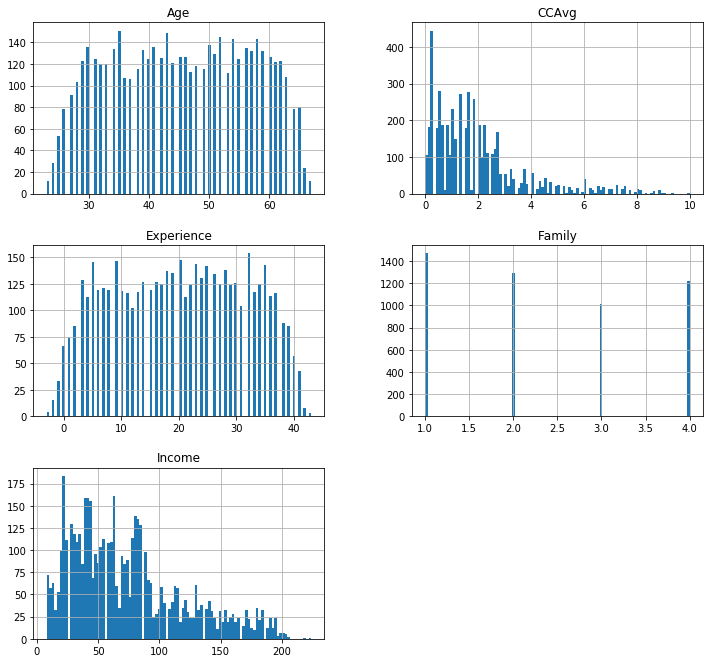

In [164]:
#Univariate plots
columns = list(data)[0:-6] # Excluding Outcome column which has only 
data[columns].hist(stacked=False, bins=100, figsize=(12,40), layout=(10,2)); 
# Histogram of first 8 columns

Distributions for Income and CCAvg are right skewed. Good practise suggests that one should normalize both data set. For this exercise, we would carry on with the analysis.

Correlation in data 

In [83]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


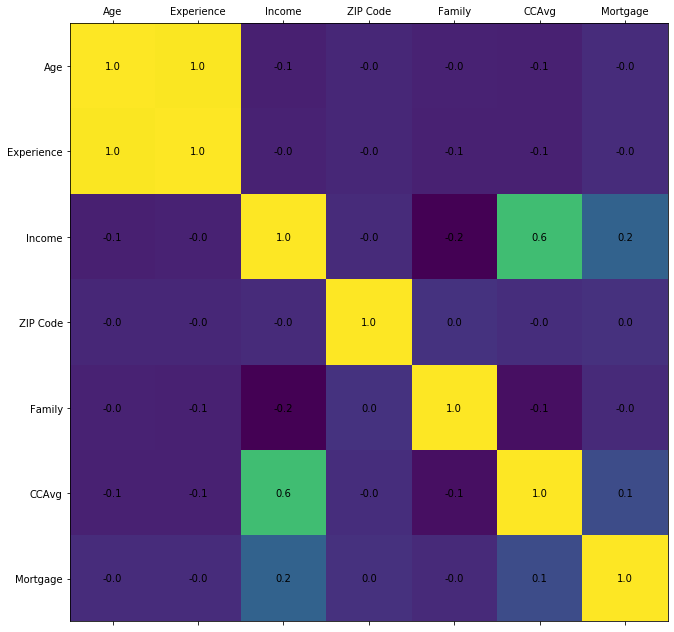

In [84]:

plot_corr(pdata2)

From the correlation heat map, it can be seen that there is a strong correlation between age and experience. Also, there is a fair correlation between income and average spending on credit card per month

Multivariate plots

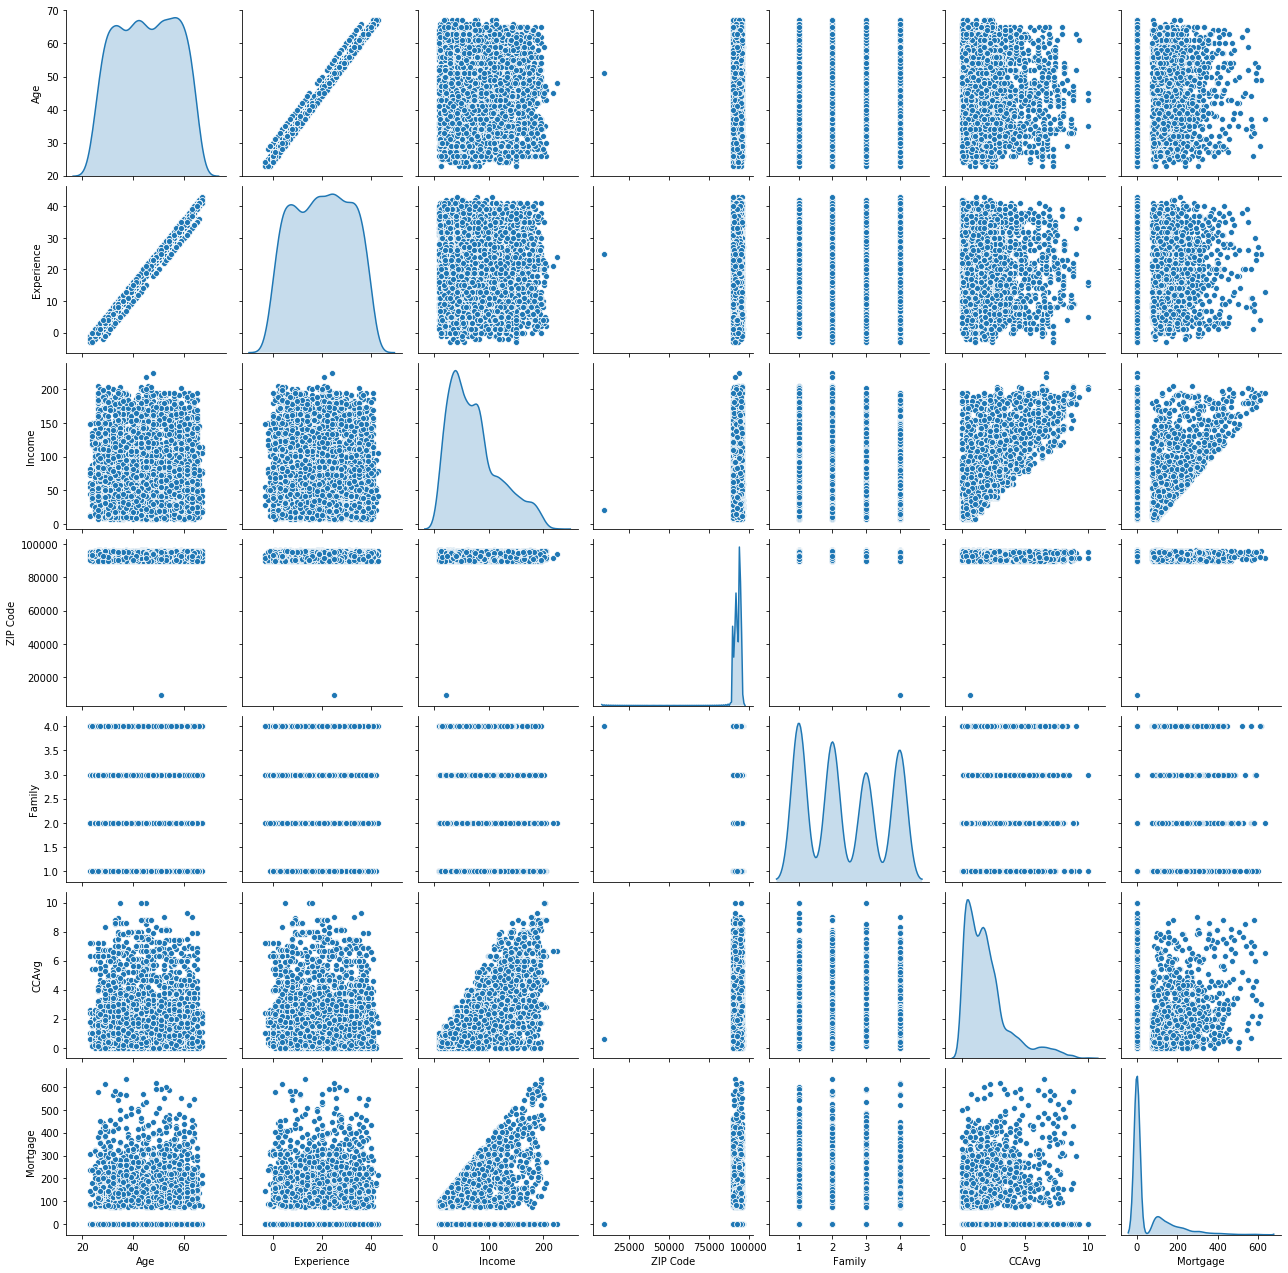

In [85]:
#Multivariate plots
sns.pairplot(pdata2,diag_kind='kde')
plt.show()

#### Model building using Logistic Regression from Sklearn
We will use the sklearn library to build the model and make predictions

In [15]:
## Define X and Y variables
X = data.drop('Personal Loan', axis=1)
Y = data[['Personal Loan']]

In [16]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

#### 3.Split the data into training and test set in the ratio of 70:30 respectively (5marks)

In [17]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

#### 4.Use  Logistic  Regressionmodel  to  predict whether the customer will  take  personal  loan  or not. Print all the metrics related for evaluating the model performance (15marks)

In [19]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
# dupplicatefrom sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#When given the right parameter, the equation below will predict if a cutomer will take a lone or not
y_predict = logreg.predict(X_test)

In [21]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9568571428571429

Testing accuracy 0.9513333333333334

Confusion Matrix


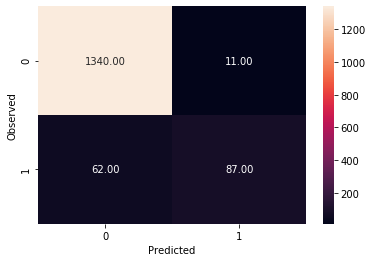

None

Recall: 0.5838926174496645

Precision: 0.8877551020408163

F1 Score: 0.7044534412955465

Roc Auc Score: 0.7878752502496286


In [171]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

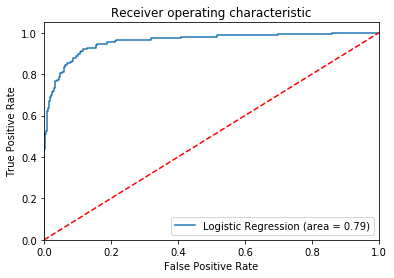

In [175]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### 5. Give your reasoning on how can the model perform better? (10 marks)Hint:Check parameter

In [176]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [177]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.957, 0.957, 0.957, 0.91, 0.907]

[0.959, 0.951, 0.953, 0.904, 0.905]


In [178]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.958, 0.907]

[0.959, 0.905]


In [179]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9085714285714286

Testing accuracy 0.9113333333333333


In [180]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.865, 0.904, 0.904, 0.907, 0.909, 0.909]

[0.847, 0.899, 0.903, 0.907, 0.909, 0.911]


In [181]:
## Best testing accuracy is obtained for C=1,

In [22]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=1) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Trainig accuracy 0.9022857142857142

Testing accuracy 0.8906666666666667

Confusion Matrix


NameError: name 'sns' is not defined

In [ ]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### 6.Give Business understanding of your model? (5 marks)

Confusion matrix means

True Positive (observed=1,predicted=1):

Predicted that liability customer was converted to Personal Loan customer and he took a Personal Loan 

False Positive (observed=0,predicted=1):

Predicted that liability customer was converted to Personal Loan customer and he didnt take a Personal Loan


True Negative (observed=0,predicted=0):

Predicted that liability customer was not converted to Personal Loan customer and he didnt take a Personal Loan


False Negative (observed=1,predicted=0):

Predicted that liability customer was not converted to Personal Loan customer and he took a Personal Loan

Here the bank wants to convert liability customers to Personal Loan customers i.e less number of False Positive, if FP is  
high, the banks resources that was put into advert campaign would be wasted with no justifiable results. Hence Precision is the important metric.

In case of False negative bank, liability customers that were not converted still took personal loans which is good for the bank.

After achieving the desired accuracy we can deploy the model for practical use. The bank now can predict who is converted. They can use the model for upcoming liability customers.